In [1]:
import pandas as pd 
import yfinance as yf
from datetime import datetime, timedelta


In [2]:
SP500_Url = "https://en.wikipedia.org/wiki/Nasdaq-100"
data_table = pd.read_html(
    SP500_Url,
    storage_options={"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                                   "(KHTML, like Gecko) Chrome/123.0 Safari/537.36"}
)
data_table

[                                     0                                      1
 0   Nasdaq-100 Index from 1985 to 2015     Nasdaq-100 Index from 1985 to 2015
 1                           Foundation         January 31, 1985; 40 years ago
 2                             Operator                           Nasdaq, Inc.
 3                            Exchanges                                 Nasdaq
 4                       Trading symbol                            ^NDX or NDX
 5                         Constituents                                    101
 6                                 Type                              Large-cap
 7                           Market cap  US$25.34 trillion (as of May 1, 2025)
 8                     Weighting method     Free-float capitalization-weighted
 9                      Related indices                   Nasdaq Financial-100
 10                             Website                  nasdaq.com/nasdaq-100,
    Category  All-Time Highs[8]       All-Time High

In [3]:
tickers = data_table[4]["Ticker"].tolist()

In [4]:
supp = ['ASML', 'AZN', 'F', 'G', 'GOOGL', 'H', 'I', 'J', 'L', 'O', 'Q', 'R', 'U', 'VRSK', 'W', 'Y']

tickers = [x for x in tickers if x not in supp]
print(len(tickers), len(supp))

97 16


In [5]:
# Extraction des données
Date = data_table[5]['Date']
Removed = data_table[5]['Removed']['Ticker']  # Supposant que 'Removed' est un DataFrame ou Series
Added = data_table[5]['Added']['Ticker']      # Supposant que 'Added' est un DataFrame ou Series

# Combinaison des données dans un DataFrame
Data_Change = pd.concat([Date, Added, Removed], axis = 1)

#Date au format Date
Data_Change['Date'] = pd.to_datetime(Data_Change['Date'])

# Changer le format de la date en 'jour/mois/année'
Data_Change['Date'] = Data_Change['Date'].dt.strftime('%Y-%m-%d')


# Renommer toutes les colonnes
Data_Change.columns = ['Date', 'Added', 'Removed']

# Mettre 'colonne_a' en tant qu'index
Data_Change.set_index('Date', inplace=True)

# Nan en vide
Data_Change = Data_Change.fillna('')

Data_Change

,Added,Removed
Date,,
2025-07-28,TRI,
2025-07-17,,ANSS
2025-05-19,SHOP,MDB
2024-12-23,PLTR,ILMN
2024-12-23,MSTR,MRNA
...,...,...
2007-07-12,FWLT,BMET
2007-06-01,CEPH,MEDI
2007-03-08,UAUA,AEOS


In [6]:
len(tickers)

97

In [7]:
# Supposons que la liste tickers ait déjà 503 éléments au départ
# tickers = ['AAPL', 'MSFT', ...]  # Exemples de tickers initiaux

# Initialiser un dictionnaire vide
dict = {}

# Boucle pour parcourir les données et mettre à jour le dictionnaire
for i in range(0, len(Data_Change)):
    
    # Ajouter les nouveaux tickers (si ce n'est pas déjà un ensemble vide)
    tickers.extend(Data_Change.Added[i])
    
    # Essayer de supprimer les tickers retirés, si possible
    try:
        tickers = [t for t in tickers if t not in Data_Change.Removed[i]]  # Supprimer les tickers retirés
    except ValueError:
        # Si l'élément à supprimer n'existe pas dans la liste, continuer sans erreur
        pass
    
    # Trier les tickers
    tickers = sorted(set(tickers))  # Utilisation de set pour éviter les doublons

    # Ajouter une **copie** de la liste `tickers` dans le dictionnaire
    dict[Data_Change.index[i]] = tickers.copy()

df = pd.DataFrame(list(dict.items()), columns=['date', 'tickers'])

df['date'] = pd.to_datetime(df['date'])

# Mettre la colonne 'date' comme index
df.set_index('date', inplace=True)

df

/var/folders/6k/82j2nnl13hj9ld7nmzpdt6fh0000gn/T/ipykernel_4768/1527443372.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tickers.extend(Data_Change.Added[i])
/var/folders/6k/82j2nnl13hj9ld7nmzpdt6fh0000gn/T/ipykernel_4768/1527443372.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tickers = [t for t in tickers if t not in Data_Change.Removed[i]]  # Supprimer les tickers retirés


,tickers
date,
2025-07-28,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."
2025-07-17,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."
2025-05-19,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."
2024-12-23,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA..."
2024-11-18,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA..."
...,...
2007-07-12,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA..."
2007-06-01,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA..."
2007-03-08,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."


In [8]:
# Récupère l'index en liste
new_index = list(df.index)

# Remplace la première valeur
new_index[0] = datetime.today().date()

# Réapplique l'index modifié
df.index = pd.to_datetime(new_index)

In [9]:
df

,tickers
2025-09-14,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."
2025-07-17,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."
2025-05-19,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."
2024-12-23,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA..."
2024-11-18,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA..."
...,...
2007-07-12,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA..."
2007-06-01,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA..."
2007-03-08,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."
2007-02-14,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ..."


In [20]:

data_SP500_old = pd.read_parquet('data_NASDAQ.parquet')
last_date = data_SP500_old['Date'].sort_values(ascending=True).iloc[-1] + timedelta(days=1)
last_date


Timestamp('2025-09-13 00:00:00')

In [21]:

df['Last_Date'] = last_date
df

,tickers,Last_Date
2025-09-14,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ...",2025-09-13
2025-07-17,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ...",2025-09-13
2025-05-19,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ...",2025-09-13
2024-12-23,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA...",2025-09-13
2024-11-18,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA...",2025-09-13
...,...,...
2007-07-12,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA...",2025-09-13
2007-06-01,"[A, AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMA...",2025-09-13
2007-03-08,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ...",2025-09-13
2007-02-14,"[AAPL, ABNB, ADBE, ADI, ADP, ADSK, AEP, AMAT, ...",2025-09-13


In [22]:

# Initialiser une DataFrame vide pour stocker toutes les données
data_SP500 = pd.DataFrame()

df = df.explode('tickers')
end_date = df[df.index > last_date].groupby('tickers').apply(lambda x: x.index.max())

# Combiner les résultats dans une nouvelle DataFrame
resultat = pd.DataFrame({'Start': last_date, 'End': end_date})
resultat


/var/folders/6k/82j2nnl13hj9ld7nmzpdt6fh0000gn/T/ipykernel_4734/2328952231.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  end_date = df[df.index > last_date].groupby('tickers').apply(lambda x: x.index.max())


,Start,End
tickers,,
AAPL,2025-09-13,2025-09-14
ABNB,2025-09-13,2025-09-14
ADBE,2025-09-13,2025-09-14
ADI,2025-09-13,2025-09-14
ADP,2025-09-13,2025-09-14
...,...,...
VRTX,2025-09-13,2025-09-14
WBD,2025-09-13,2025-09-14
WDAY,2025-09-13,2025-09-14


In [10]:
"""
# Initialiser une DataFrame vide pour stocker toutes les données
data_SP500 = pd.DataFrame()

df = df.explode('tickers')
start_date = df.groupby('tickers').apply(lambda x: x.index.min())
end_date = df.groupby('tickers').apply(lambda x: x.index.max())

# Combiner les résultats dans une nouvelle DataFrame
resultat = pd.DataFrame({'Start': start_date, 'End': end_date})
resultat
"""

/var/folders/6k/82j2nnl13hj9ld7nmzpdt6fh0000gn/T/ipykernel_4768/2969811319.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  start_date = df.groupby('tickers').apply(lambda x: x.index.min())
/var/folders/6k/82j2nnl13hj9ld7nmzpdt6fh0000gn/T/ipykernel_4768/2969811319.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  end_date = df.groupby('tickers').apply(lambda x: x.index.max())


,Start,End
tickers,,
A,2007-06-01,2024-12-23
AAPL,2007-02-01,2025-09-14
ABNB,2007-02-01,2025-09-14
ADBE,2007-02-01,2025-09-14
ADI,2007-02-01,2025-09-14
...,...,...
X,2008-04-30,2024-12-23
XEL,2007-02-01,2025-09-14
Y,2007-02-01,2017-12-18


In [11]:
# Télécharger les données pour chaque ticker
for ticker in resultat.index:
    start_date = resultat.loc[ticker, 'Start']
    end_date = resultat.loc[ticker, 'End']

    print(f"Téléchargement des données pour {ticker} de {start_date} à {end_date}")

    # Télécharger les données de l'action entre les dates spécifiées
    data = yf.download(
                        ticker,
                        start=start_date,
                        end=end_date,
                        interval="1d",
                        auto_adjust=True,
                        actions=False
                        )

    # Ajouter une colonne pour identifier le ticker
    data['Ticker'] = ticker

    # On retire le niveau des tickers pour ne garder que 'Close' et 'Volume'
    data.columns = data.columns.droplevel(level=1)
    
    # Concaténer les données dans la DataFrame globale
    data_SP500 = pd.concat([data_SP500, data])

# Affichage de la DataFrame résultante
data_SP500

Téléchargement des données pour A de 2007-06-01 00:00:00 à 2024-12-23 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AAPL de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ABNB de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour ADBE de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour ADI de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


Téléchargement des données pour ADP de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ADSK de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AEP de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AMAT de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AMD de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour AMGN de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AMZN de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour APP de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ARM de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour AVGO de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AXON de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour B de 2007-08-27 00:00:00 à 2023-12-18 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BIIB de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour BKNG de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BKR de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour C de 2007-03-08 00:00:00 à 2024-07-22 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CCEP de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CDNS de 2009-01-20 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour CDW de 2022-01-24 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CEG de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour CHTR de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CMCSA de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour COST de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour CPRT de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CRWD de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour CSCO de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CSGP de 2020-08-24 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour CSX de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CTAS de 2011-04-04 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CTSH de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour D de 2007-07-12 00:00:00 à 2023-07-17 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DASH de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour DDOG de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DXCM de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour E de 2007-08-27 00:00:00 à 2023-06-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EA de 2019-03-19 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour EXC de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour F de 2007-02-01 00:00:00 à 2022-12-19 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FANG de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour FAST de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FTNT de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour G de 2007-02-01 00:00:00 à 2023-06-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GEHC de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour GFS de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GILD de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GOOG de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour H de 2007-02-01 00:00:00 à 2025-05-19 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HON de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour I de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['I']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour IDXX de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour INTC de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour INTU de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ISRG de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour J de 2007-02-01 00:00:00 à 2017-02-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour K de 2009-01-20 00:00:00 à 2023-12-18 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour KDP de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour KHC de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour KLAC de 2016-03-16 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour L de 2007-02-01 00:00:00 à 2023-12-18 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LIN de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LRCX de 2013-01-15 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour LULU de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour M de 2007-08-27 00:00:00 à 2024-07-22 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MAR de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour MCHP de 2014-04-03 00:00:00 à 2025-09-14 00:00:00


Téléchargement des données pour MDLZ de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour MELI de 2007-02-01 00:00:00 à 2025-09-14 00:00:00



[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour META de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour MNST de 2008-12-22 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MRVL de 2013-01-15 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour MSFT de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MSTR de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour MU de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['N']: YFPricesMissingError('possibly delisted; no price data found  (1d 2007-10-08 00:00:00 -> 2024-12-23 00:00:00)')


Téléchargement des données pour N de 2007-10-08 00:00:00 à 2024-12-23 00:00:00
Téléchargement des données pour NFLX de 2013-01-15 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NVDA de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NXPI de 2017-03-20 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour O de 2007-02-01 00:00:00 à 2025-05-19 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ODFL de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ON de 2022-02-02 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour ORLY de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour P de 2007-03-08 00:00:00 à 2025-05-19 00:00:00
Téléchargement des données pour PANW de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PAYX de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PCAR de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PDD de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour PEP de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PLTR de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour PYPL de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2007-02-01 00:00:00 -> 2012-12-24 00:00:00)')


Téléchargement des données pour Q de 2007-02-01 00:00:00 à 2012-12-24 00:00:00
Téléchargement des données pour QCOM de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour R de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour REGN de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour ROP de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ROST de 2008-04-30 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour S de 2009-01-20 00:00:00 à 2025-05-19 00:00:00
Téléchargement des données pour SBUX de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SHOP de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour SNPS de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour T de 2007-10-08 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TEAM de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour TMUS de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TRI de 2017-06-19 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour TSLA de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TTD de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour TTWO de 2021-07-21 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TXN de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour U de 2007-02-01 00:00:00 à 2018-12-24 00:00:00


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['U']: YFPricesMissingError('possibly delisted; no price data found  (1d 2007-02-01 00:00:00 -> 2018-12-24 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1170306000, endDate = 1545627600")')
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour V de 2007-02-14 00:00:00 à 2022-12-19 00:00:00
Téléchargement des données pour VRTX de 2007-02-01 00:00:00 à 2025-09-14 00:00:00



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour W de 2007-02-01 00:00:00 à 2023-12-18 00:00:00
Téléchargement des données pour WBD de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WDAY de 2007-02-01 00:00:00 à 2025-09-14 00:00:00
Téléchargement des données pour X de 2008-04-30 00:00:00 à 2024-12-23 00:00:00


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['X']: YFPricesMissingError('possibly delisted; no price data found  (1d 2008-04-30 00:00:00 -> 2024-12-23 00:00:00) (Yahoo error = "No data found, symbol may be delisted")')


Téléchargement des données pour XEL de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour Y de 2007-02-01 00:00:00 à 2017-12-18 00:00:00


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['Y']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour Z de 2011-05-27 00:00:00 à 2022-02-22 00:00:00
Téléchargement des données pour ZS de 2007-02-01 00:00:00 à 2025-09-14 00:00:00


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Ticker,Adj Close
Date,,,,,,,
2007-06-01,24.376429,24.427373,24.102609,24.306381,2656759.0,A,NaN
2007-06-04,24.510162,24.599314,24.191767,24.198134,2229950.0,A,NaN
2007-06-05,24.497437,24.554747,24.319134,24.331870,2744274.0,A,NaN
2007-06-06,24.433748,24.516532,24.293654,24.312758,2975224.0,A,NaN
2007-06-07,23.726902,24.433742,23.726902,24.274543,3567416.0,A,NaN
...,...,...,...,...,...,...,...
2025-09-08,281.600006,281.760010,273.734009,275.000000,1839700.0,ZS,NaN
2025-09-09,282.290009,284.339996,279.000000,281.350006,1634400.0,ZS,NaN
2025-09-10,278.790009,288.890015,276.309998,284.299988,1836000.0,ZS,NaN


In [12]:
data_SP500 = data_SP500.reset_index()
data_SP500

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close
0,2007-06-01,24.376429,24.427373,24.102609,24.306381,2656759.0,A,NaN
1,2007-06-04,24.510162,24.599314,24.191767,24.198134,2229950.0,A,NaN
2,2007-06-05,24.497437,24.554747,24.319134,24.331870,2744274.0,A,NaN
3,2007-06-06,24.433748,24.516532,24.293654,24.312758,2975224.0,A,NaN
4,2007-06-07,23.726902,24.433742,23.726902,24.274543,3567416.0,A,NaN
...,...,...,...,...,...,...,...,...
430769,2025-09-08,281.600006,281.760010,273.734009,275.000000,1839700.0,ZS,NaN
430770,2025-09-09,282.290009,284.339996,279.000000,281.350006,1634400.0,ZS,NaN
430771,2025-09-10,278.790009,288.890015,276.309998,284.299988,1836000.0,ZS,NaN
430772,2025-09-11,286.660004,292.940002,281.450012,282.049988,1946700.0,ZS,NaN


In [26]:
df_concat = pd.concat([data_SP500, data_SP500_old])
df_concat

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close
0,2025-09-12,234.070007,234.509995,229.020004,229.270004,55220889.0,AAPL,NaN
1,2025-09-12,122.550003,123.449997,121.839996,122.989998,5072519.0,ABNB,NaN
2,2025-09-12,349.359985,366.500000,341.609985,360.200012,14079176.0,ADBE,NaN
3,2025-09-12,245.210007,248.229996,244.979996,247.619995,2109608.0,ADI,NaN
4,2025-09-12,293.500000,296.855011,292.190002,294.959991,1100046.0,ADP,NaN
...,...,...,...,...,...,...,...,...
70,2025-09-12,107.500000,108.419998,107.199997,107.430000,4781900.0,ORLY,NaN
71,2025-09-12,196.289993,199.949997,196.160004,197.179993,4429800.0,PANW,NaN
72,2025-09-12,135.110001,135.970001,134.679993,135.089996,1305400.0,PAYX,NaN
62,2025-09-12,509.899994,512.549988,503.850006,506.649994,23612600.0,MSFT,NaN


In [27]:
df_concat.sort_values(by=['Date'], ascending=True, inplace=True)
df_concat.tail(50)

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close
50,2025-09-12,26.129999,26.570000,26.045000,26.559999,17124131.0,KHC,NaN
77,2025-09-12,66.889999,67.750000,66.860001,67.209999,7492019.0,PYPL,NaN
78,2025-09-12,161.830002,162.300003,159.580002,161.330002,5427894.0,QCOM,NaN
79,2025-09-12,187.449997,190.360001,187.309998,189.039993,409814.0,R,NaN
80,2025-09-12,560.000000,570.000000,559.450012,567.340027,592210.0,REGN,NaN
81,2025-09-12,512.530029,517.163208,512.080017,515.580017,603426.0,ROP,NaN
82,2025-09-12,147.899994,150.339996,146.770096,149.990005,2053962.0,ROST,NaN
83,2025-09-12,81.900002,82.542801,81.199997,82.370003,9717959.0,SBUX,NaN
84,2025-09-12,143.380005,144.619995,141.529999,143.520004,4905477.0,SHOP,NaN
85,2025-09-12,425.450012,444.190002,421.950012,444.190002,6638146.0,SNPS,NaN


In [28]:
df_concat['Date'].max()

Timestamp('2025-09-12 00:00:00')

In [29]:
# Sauvegarder la DataFrame résultante dans un fichier CSV
#data_SP500.to_csv('/Users/forget/PyCharmMiscProject/historical_data_S&P500_From_Wiki.csv')

In [30]:
"""
mask_1 = data_SP500[(data_SP500['Ticker'] == 'NVR') & (data_SP500['Date'] < '1993-10-01')]
mask_2 = data_SP500[(data_SP500['Ticker'] == 'HUBB') & (data_SP500['Date'] < '1994-10-31')]
mask_3 = data_SP500[(data_SP500['Date'] == '1984-12-31') & (data_SP500['Ticker'] == 'BEN')]
"""

"\nmask_1 = data_SP500[(data_SP500['Ticker'] == 'NVR') & (data_SP500['Date'] < '1993-10-01')]\nmask_2 = data_SP500[(data_SP500['Ticker'] == 'HUBB') & (data_SP500['Date'] < '1994-10-31')]\nmask_3 = data_SP500[(data_SP500['Date'] == '1984-12-31') & (data_SP500['Ticker'] == 'BEN')]\n"

In [31]:
"""
idx_to_drop = mask_1.index.union(mask_2.index).union(mask_3.index)
data_SP500 = data_SP500.drop(index=idx_to_drop).copy()
"""

'\nidx_to_drop = mask_1.index.union(mask_2.index).union(mask_3.index)\ndata_SP500 = data_SP500.drop(index=idx_to_drop).copy()\n'

In [14]:
df_concat.to_parquet("/Users/forget/Library/Mobile Documents/com~apple~CloudDocs/Project Stock Market Deep Learning/Data/data_NASDAQ.parquet")

In [33]:
data_SP500.sort_values(by='Date', ascending=True)

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close
0,2025-09-12,234.070007,234.509995,229.020004,229.270004,55220889.0,AAPL,NaN
71,2025-09-12,196.289993,199.940002,196.154999,198.274994,3865672.0,PANW,NaN
70,2025-09-12,107.500000,108.419998,107.199997,107.430000,4676151.0,ORLY,NaN
69,2025-09-12,48.259998,49.119999,48.049999,48.939999,4281839.0,ON,NaN
68,2025-09-12,144.889999,149.229996,144.464996,148.510193,1861675.0,ODFL,NaN
...,...,...,...,...,...,...,...,...
28,2025-09-12,86.800003,87.389999,86.430000,86.680000,1214293.0,CSGP,NaN
27,2025-09-12,66.529999,67.339996,66.129997,66.879997,18349576.0,CSCO,NaN
26,2025-09-12,436.100006,443.000000,435.000000,435.000000,2759279.0,CRWD,NaN
24,2025-09-12,967.900024,969.570007,960.000000,960.289978,1459639.0,COST,NaN


In [34]:
a = data_SP500.copy()

In [35]:
b = a[a['Ticker'] == 'BEN']

In [36]:
b = a[(a['Ticker'] == 'BEN') & (a['Date'] < '1985-02-01') & (a['Date'] > '1984-12-01')].sort_values('Date')
b

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close


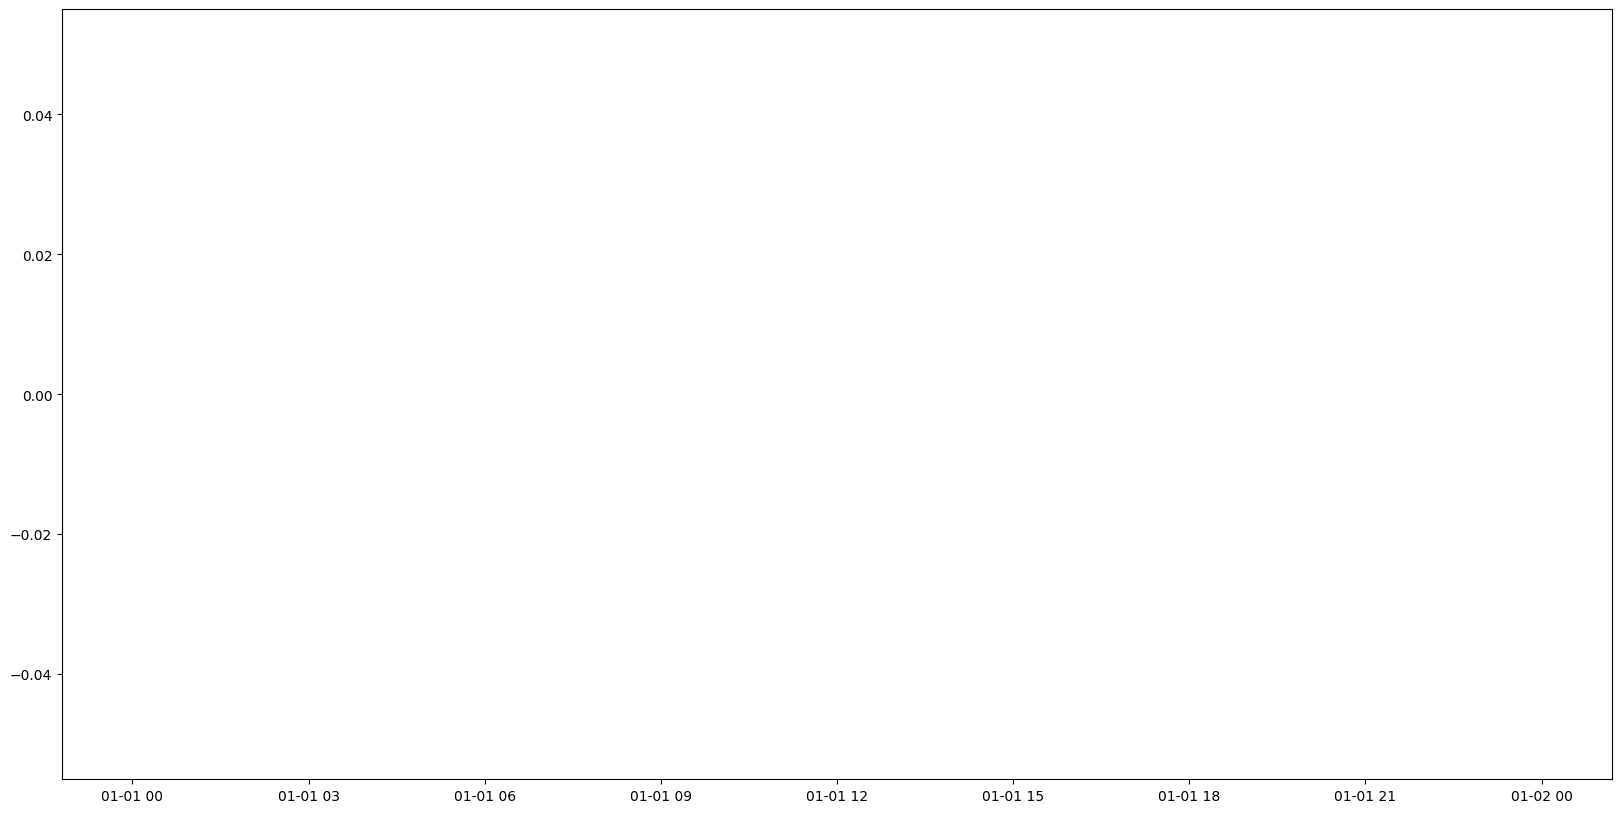

In [37]:
import matplotlib.pyplot as plt

x = b['Date']
y = b['Close']
plt.figure(figsize=(20, 10))
plt.scatter(x, y, s=1)